In [76]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('/Users/yolanda/Downloads/movies.csv')


In [8]:
 # Lets look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [14]:
# Searching for any missing data

for col in df.columns :
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [16]:
#Data types for the coloumns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [22]:
#Changing the data type of the columns
df['budget'] = df['budget'].round().astype('Int64')
df['gross'] = df['gross'].round().astype('Int64')

In [128]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55   4500000.0   58853106.0      731    104.0  
2  1745       55  18000000.0  538375067.0     1540    124.0  
3  2246       55   3500000.0   83453539.0     1812     88.0  
4   410       55   6000000.0   39846344.0     1777     98.0

In [30]:
#correcting the year coloumn
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [130]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55   4500000.0   58853106.0      731    104.0  
2  1745       55  18000000.0  538375067.0     1540    124.0  
3  2246       55   3500000.0   83453539.0     1812     88.0  
4   410       55   6000000.0   39846344.0     1777     98.0

In [52]:
df = df.sort_values(by=['gross'],inplace=False,ascending=False)

In [38]:
pd.set_option('display.max_rows',None)

In [44]:
# Drop any duplicated

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [132]:
 df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1  5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2  5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3   286       4      4  1980      1492    7.7   221000.0      1301    2000   
4  1027       6      4  1980      1543    7.3   108000.0      1054     521   

   star  country      budget        gross  company  runtime  
0  1047       54  19000000.0   46998772.0     2319    146.0  
1   327       55   4500000.0   58853106.0      731    104.0  
2  1745       55  18000000.0  538375067.0     1540    124.0  
3  2246       55   3500000.0   83453539.0     1812     88.0  
4   410       55   6000000.0   39846344.0     1777     98.0

In [48]:
#Budget High Correlation


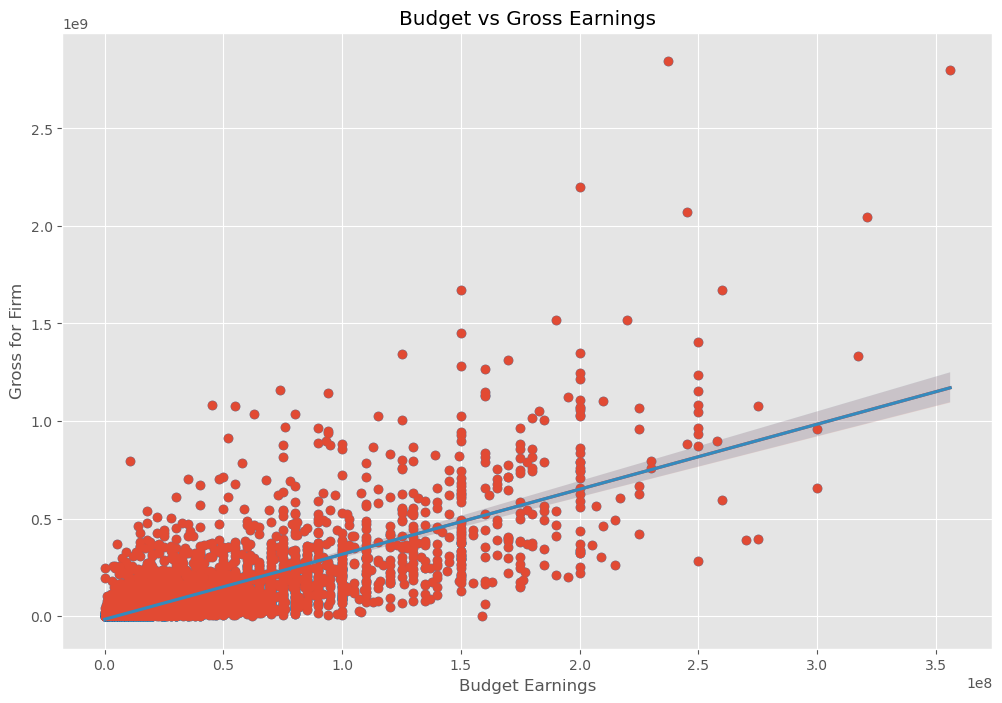

In [64]:
#Scatter Plot with Budget vs Gross 

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget Earnings')
plt.ylabel( 'Gross for Firm')

plt.show()

In [80]:
#Plotting the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df , scatter_kws={"color" : "red"}, line_kws={"color": "blue"})

<Axes: xlabel='budget', ylabel='gross'>

In [70]:
#Determing the correlation between the numeric columns

In [92]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson') 

In [94]:
#df.corr(method='pearson') (this line doesn't work, so we try again)

In [96]:
#High Correlation between budget and gross

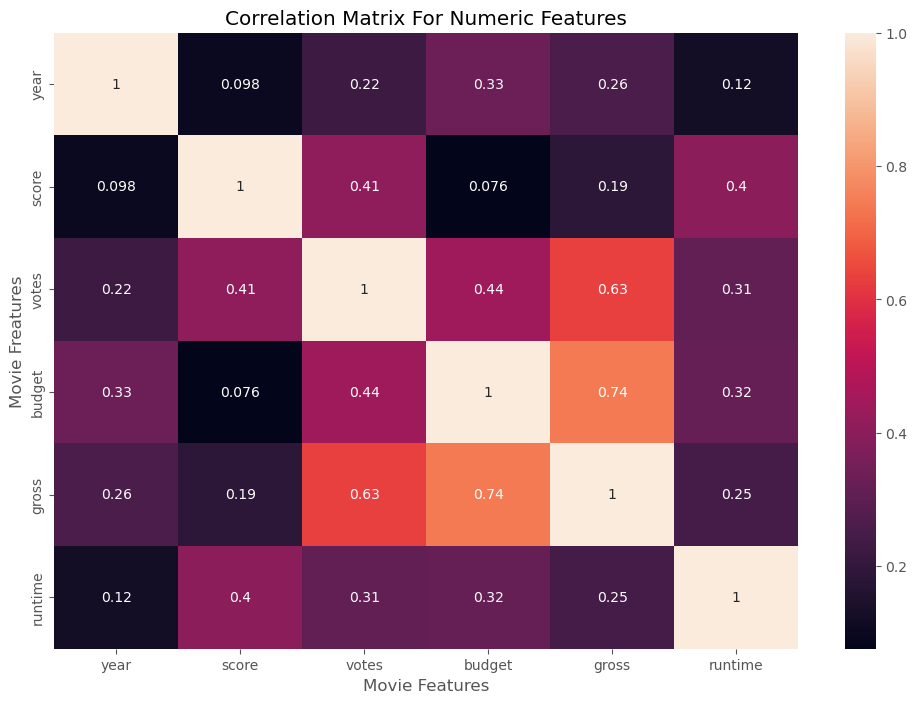

In [102]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel( 'Movie Freatures')

plt.show() 



In [106]:
#Looking at the Company Column 
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [110]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes

df_numerized


name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

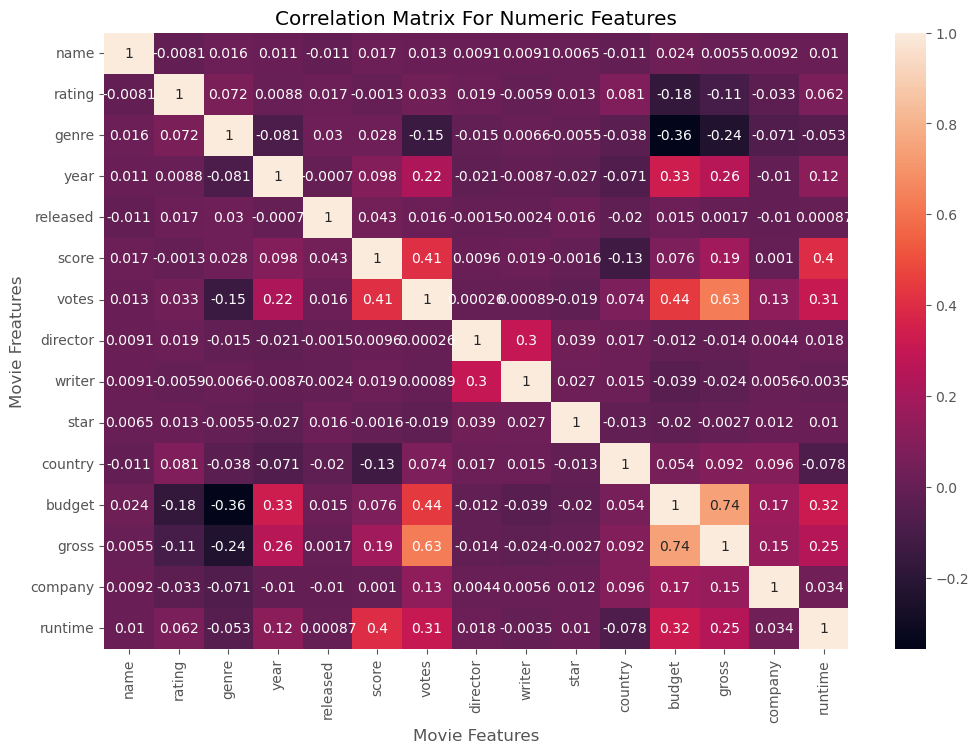

In [112]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')
plt.ylabel( 'Movie Freatures')

plt.show() 

In [116]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [122]:
sorted_pairs= corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [126]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings
#Company has low correlation

In [ ]:
#End of Code ;)